## Enzyme Kinetics (Part 1)

Implement and simulate a model in which an enzyme E in necessary for a reaction in which a substrate S is consumed to produce a product P.

\begin{eqnarray*}
\frac{dS}{dt} &=& -k_1\cdot S\cdot E + k_{-1}\cdot SE\\
\frac{dE}{dt} &=& -k_1S\cdot E + k_{-1}SE + k_2\cdot SE\\
\frac{dP}{dt} &=& k_2\cdot SE\\
\frac{dSE}{dt} &=& k_1\cdot S\cdot E - k_{-1}\cdot SE - k_2\cdot SE\\
\end{eqnarray*}

where SE is the compound of S and E.

Code it up using names that are more appropriate for programming ($k_1$ becomes k1f for "forward", $k_{-1}$ becomes k1b for "backward", $k_2$ becomes k2).

In [4]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt


def enzyme_model( t, y, params ):
    S = y[0]
    E = y[1]
    P = y[2]
    SE = y[3]

    k1f = params[0]
    k1b = params[1]
    k2 = params[2]

    dydt = np.zeros( (4,) )
    dydt[0] = -k1f*S*E + k1b*SE # S
    dydt[1] = -k1f*S*E + k1b*SE + k2*SE #E
    dydt[2] = k2*SE #P
    dydt[3] = k1f*S*E - k1b*SE - k2*SE #SE
    return dydt

### Simulating when Enzyme concentration is low
A realistic scenario is one in which the enzyme concentration is low.

Use k1f = 2, k1b=2, k2 = 3, S(0) = 100, E(0) = 1, SE(0) = 0, P(0) = 0.

Simulate with from t=0 to t=100 with a timestep of 0.1

In [5]:
# There is lots of substrate, but not lots of enzymes.
k1f = 2
k1b = 1
k2 = 3
params = (k1f, k1b, k2)

S0 = 100
E0 = 1
SE0 = 0
P0 = 0
yinit = (S0,E0,P0,SE0)

em = lambda t,y: enzyme_model(t,y,params)
sol = scipy.integrate.solve_ivp( fun=em, t_span=(0,100), y0=yinit, 
                                 t_eval=np.arange(0,100,1) )

Plot the simulation over time.

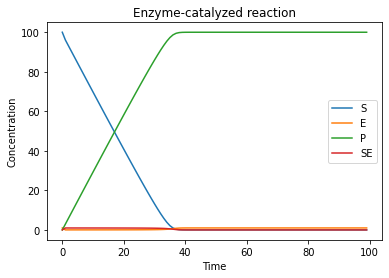

In [6]:
plt.plot( sol.t, sol.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["S","E","P","SE"])
plt.title( "Enzyme-catalyzed reaction");

Since we are interested in finding the appropriate mathematical expression for dP/dt as a function of S, determine what it is for this model, using simulation output.

Approximate dP/dt by calling np.diff on the simulation output for P.

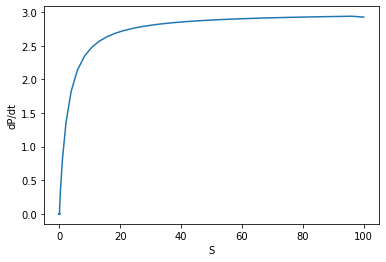

In [72]:
# And here, we see that dP/dt depends on S in a nonlinear manner.
# In particular, when S is high, dP/dt does not depend on S at all.
# and when S is smaller, we have a curve. 
P = sol.y[2,:].T
S = sol.y[0,:-1].T
velocity_of_P = np.divide(np.diff(P), (sol.t[1]-sol.t[0]))
plt.plot( S, velocity_of_P );
plt.xlabel( 'S' );
plt.ylabel( 'dP/dt' );

The curve dP/dt vs S can be expressed as

$v_{max}\frac{S}{K_m+S}$

where

$v_{max} = E(0)\cdot k_2$

and 

$K_m = \frac{k_{-1}+k_2}{k_1}$

Plot the analytic curve (from the Michaelis-Mention model for enzyme kinetics) on the same plot as the approximated dP/dt (you can just replot the curve from above and the plot the analytic curve as well).

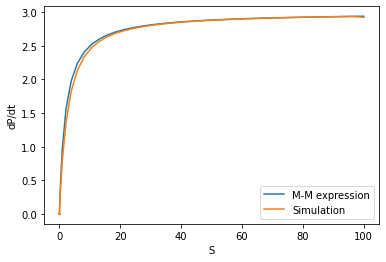

In [73]:
# The curve dP/dt vs S can be expressed as
Km = (k1b + k2)/k1f
vmax = E0*k2
analytic_dPdt = vmax * np.divide( S, (S+Km) )
plt.plot(S, analytic_dPdt)
plt.plot( S, velocity_of_P)
plt.xlabel( "S")
plt.ylabel("dP/dt")
plt.legend( ["M-M expression","Simulation"]);